# Flight Price Analysis
## Using Linear Regression and Random Forest Regression


### Import Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Clean the data and perform EDA

In [115]:
#Read csv
df = pd.read_csv('./Data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


##### Clean the Data

In [103]:


#Check number of Null and Nan values and deletes them

num_null = np.sum(df.isnull().astype('int'))
print('Number of Null and Nan values in data frame \n {}'.format(num_null))

df = df[~df.isnull()]

#Remove duplicates

num_duplicated = np.sum(df.duplicated().astype('int'))
print('Number of duplicated elements {}'.format(num_duplicated))

#Rename any columns

df.rename(columns={'Unnamed: 0':'#'} , inplace = True)

#Convert Rupees to Euro

df['price'] = df['price']/89

Number of Null and Nan values in data frame 
 Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Number of duplicated elements 0


In [104]:
df.shape

(300153, 12)

In [105]:
#Create 2 DataFrames Economy and Business class

economy_df = df[df['class'] == 'Economy']
business_df = df[df['class'] == 'Business']

#### Perform EDA

                   #       duration      days_left          price
count  206666.000000  206666.000000  206666.000000  206666.000000
mean   103332.500000      11.550060      26.123673      73.846544
std     59659.479704       7.241284      13.529610      42.062017
min         0.000000       0.830000       1.000000      12.415730
25%     51666.250000       6.250000      15.000000      46.887640
50%    103332.500000      10.170000      26.000000      64.853933
75%    154998.750000      15.250000      38.000000      87.033708
max    206665.000000      49.830000      49.000000     475.831461
                   #      duration     days_left         price
count   93487.000000  93487.000000  93487.000000  93487.000000
mean   253409.000000     13.704274     25.741857    590.337990
std     26987.516645      6.852555     13.626538    145.722636
min    206666.000000      1.000000      1.000000    134.831461
25%    230037.500000      8.830000     14.000000    507.696629
50%    253409.000000     13.

<AxesSubplot:xlabel='#', ylabel='price'>

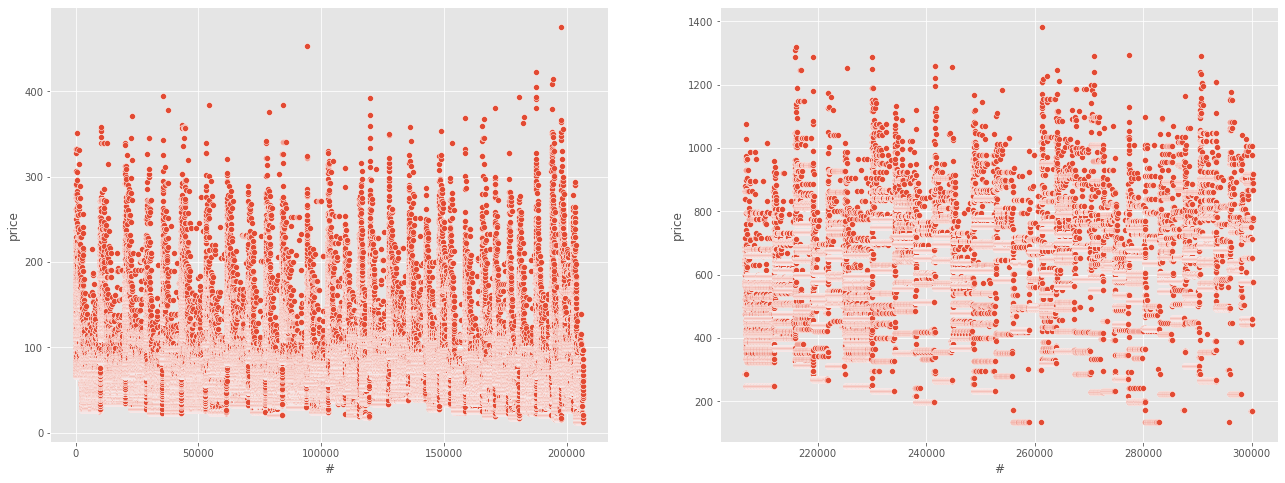

In [106]:

print(economy_df.describe())
print(business_df.describe())

#Add some graphs
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.scatterplot(data=economy_df, x='#', y='price',ax=ax[0])
sns.scatterplot(data=business_df, x='#', y='price',ax=ax[1])


As we can see from the plot it is very dificult to visualize any trend as the price depends on severall 
factors like destination, days left, airline, duration, etc. 

In [107]:
# Find correlation between values


#First make airlines, destinations stops into numbers
econ_factorized_df = economy_df.copy()
object_columns = economy_df.select_dtypes(include=['object']).columns
for col in object_columns:
    econ_factorized_df[col], _ = pd.factorize(econ_factorized_df[col])
econ_factorized_df = econ_factorized_df.drop(labels='class', axis=1)    

In [108]:
bus_factorized_df = business_df.copy()
object_columns = business_df.select_dtypes(include=['object']).columns
for col in object_columns:
    bus_factorized_df[col], _ = pd.factorize(bus_factorized_df[col])

bus_factorized_df = bus_factorized_df.drop(labels='class', axis=1)

<AxesSubplot:>

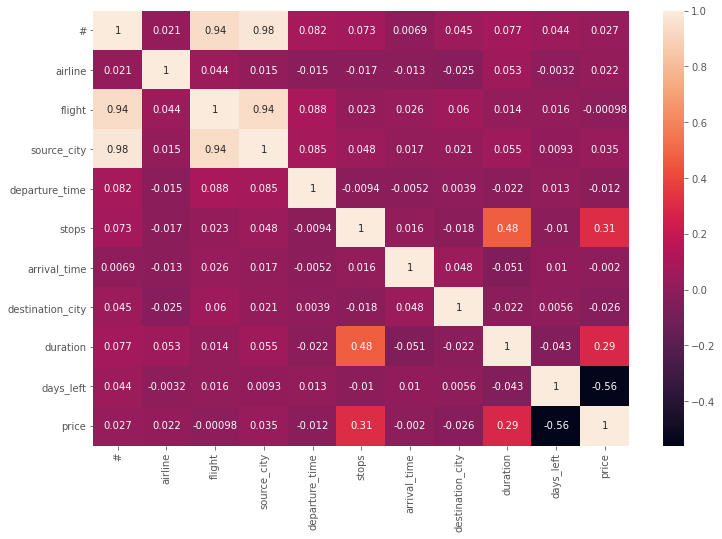

In [109]:
#Plot some graphs

sns.heatmap(econ_factorized_df.corr(), annot=True)

<AxesSubplot:>

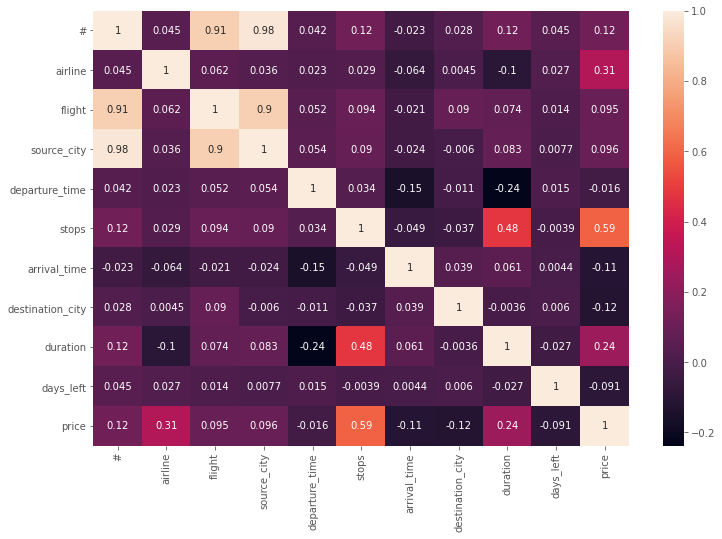

In [110]:
sns.heatmap(bus_factorized_df.corr(), annot=True)

- For economy class the most important factors determining a price are: days left, stops and duration.
- For business class the most important factors are: stops, airline and duration.

I would like to point out that it is interesting how Economy class price tickets depend much more on days left than Business class. While on the other hand arilines are a factor in Business class but not in Economy class.<br/>
I am going to continue exploring the features.

Text(0.5, 1.0, 'Business Class price vs days_left')

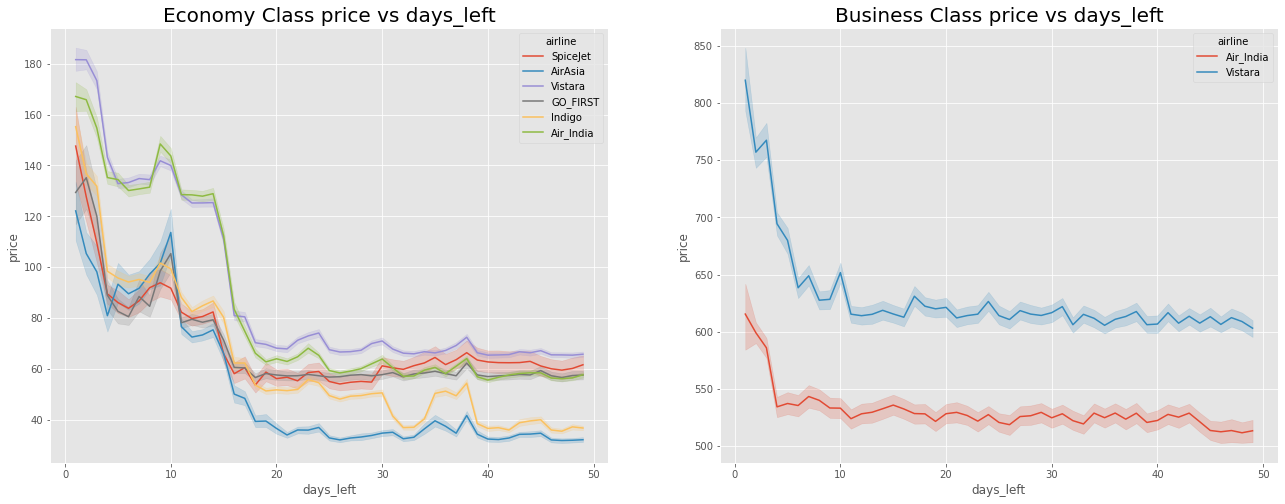

In [111]:
#Comparing prices between airlines and proving that days left is an important factor
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.lineplot(data=economy_df, x='days_left', y='price',hue='airline', ax=ax[0])
ax[0].set_title('Economy Class price vs days_left', fontsize=20)
sns.lineplot(data=business_df, x='days_left', y='price',hue='airline', ax=ax[1])
ax[1].set_title('Business Class price vs days_left', fontsize=20)

Text(0.5, 1.0, 'Business price for number of stops')

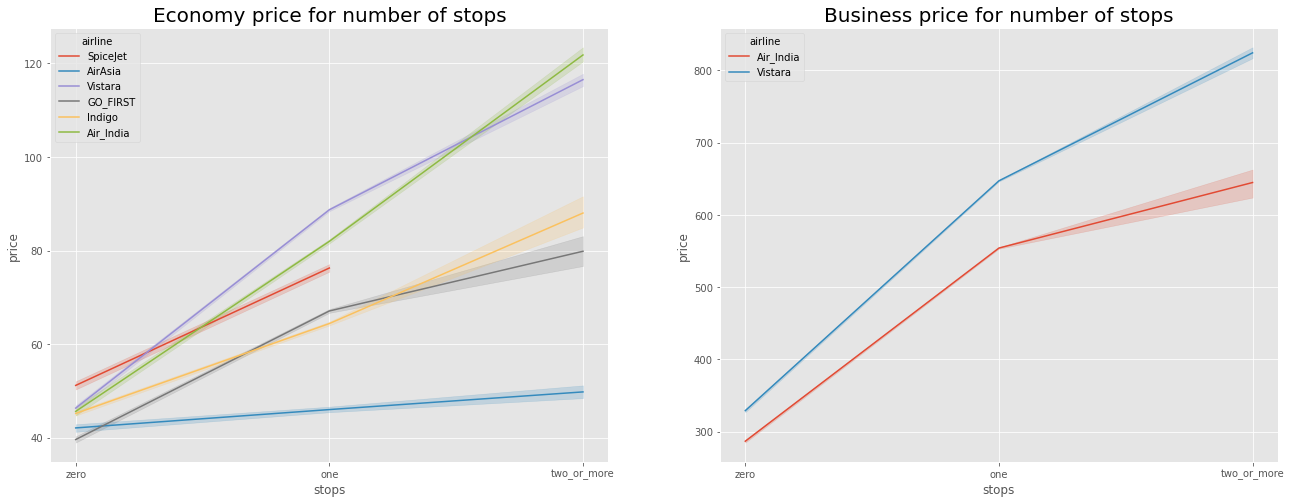

In [112]:
#Comparing prices between airlines and proving that number of stops is an important factor
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.lineplot(data=economy_df, x='stops', y='price',hue='airline', ax=ax[0])
ax[0].set_title('Economy price for number of stops', fontsize=20)
sns.lineplot(data=business_df, x='stops', y='price',hue='airline', ax=ax[1])
ax[1].set_title('Business price for number of stops', fontsize=20)

Text(0.5, 1.0, 'Business price for duration of flights')

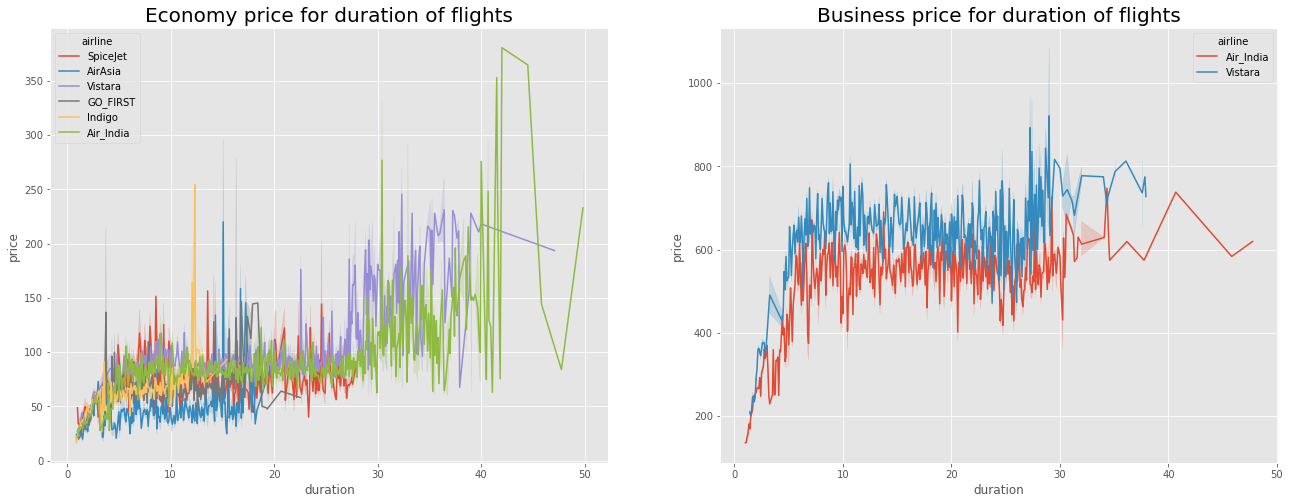

In [113]:
#Comparing prices between airlines and proving that duration of flight is an important factor
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.lineplot(data=economy_df, x='duration', y='price',hue='airline', ax=ax[0])
ax[0].set_title('Economy price for duration of flights', fontsize=20)
sns.lineplot(data=business_df, x='duration', y='price',hue='airline', ax=ax[1])
ax[1].set_title('Business price for duration of flights', fontsize=20)

In [ ]:
sns.scatterplot()

As we can confirm from the plots the days left untill the flight, airline, number of stops and duration of the flight are important factors for determining the price. <br/><br/>
It makes sense that days left is a determining factor as airlines increase the price the closer to the flight date. It would be interesting to give a look into that in a different project due to unsufficient data in this project. <br/>
Furthermore, duration and number of stops, which are correlated due to obvious reasons, also are a determining factor for price. Most likely due to the fact that there is a more fuel consumption asociated as well as more hours payed in wages to aircrew staff.
<br/>
I would like to point out that it is interesting how Economy class price tickets depend much more on days left than Business class.

## Perform Linear Regression Analysis

- We have checked with the correlation map and several plots that no multicolinearity exists in the data. <br>
We are going to check for outliers

In [17]:
# Checking for outliers Economy
Q1 = economy_df['price'].quantile(0.25)
Q3 = economy_df['price'].quantile(0.75)
iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
outliers = economy_df[(economy_df['price'] > upper_limit)&(economy_df['price'] < lower_limit)]
# Checking for outliers in Business Class
Q1 = business_df['price'].quantile(0.25)
Q3 = business_df['price'].quantile(0.75)
iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
outliers = business_df[(business_df['price'] > upper_limit)&(business_df['price'] < lower_limit)]
print(outliers)

Empty DataFrame
Columns: [#, airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []


No outliers

### Linear Regression For Economy

In [116]:
# Isolate target variable
y = economy_df['price']

# Isolate target variables
x = econ_factorized_df.drop(['price', '#', 'flight'], axis=1)

In [117]:
# Split the data
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.25, random_state=42)

In [118]:
# Fit the data using linear Regression model
log_clf = LinearRegression().fit(x_train, y_train)

In [119]:
# Get predicitions
y_pred = log_clf.predict(x_test)

In [120]:
# Get the metrics
r2_metric = r2_score(y_test, y_pred)
print(' R2 Metric:  ' + str(r2_metric))
mae_metric = mean_absolute_error(y_test, y_pred)
print('MAE: ' + str(mae_metric))
rmse_metric = mean_squared_error(y_test, y_pred)
print('RMAE: ' + str(rmse_metric))

 R2 Metric:  0.4247831417198974
MAE: 23.34703263449564
RMAE: 1000.9799313295946


### Linear Regression for Business class

In [121]:
# Isolate target variable
y = business_df['price']

# Isolate target variables
x = bus_factorized_df.drop(['price', '#','flight'], axis=1)

In [76]:
# Fit the Linear Regression model
log_clf = LinearRegression().fit(x_train, y_train)

In [77]:
# Get predicitions
y_pred = log_clf.predict(x_test)

In [78]:
# Get the metrics
r2_metric = r2_score(y_test, y_pred)
print(' R2 Metric:  ' + str(r2_metric))
mae_metric = mean_absolute_error(y_test, y_pred)
print('MAE: ' + str(mae_metric))
rmse_metric = mean_squared_error(y_test, y_pred)
print('RMAE: ' + str(rmse_metric))

 R2 Metric:  0.4276310677405447
MAE: 23.300902751918876
MAE: 996.0240320864763


## Create a Random forest model

### For Economy Class

In [90]:
# Isolate target variable
y = econ_factorized_df['price'].copy()

#Isolate features of interest
x = econ_factorized_df.copy()
x= econ_factorized_df.drop(['price', '#'], axis=1)

In [91]:
#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 5.76507593053545
R-squared: 0.8950479550964864


Text(0.5, 1.0, 'Feature Importance (MDI)')

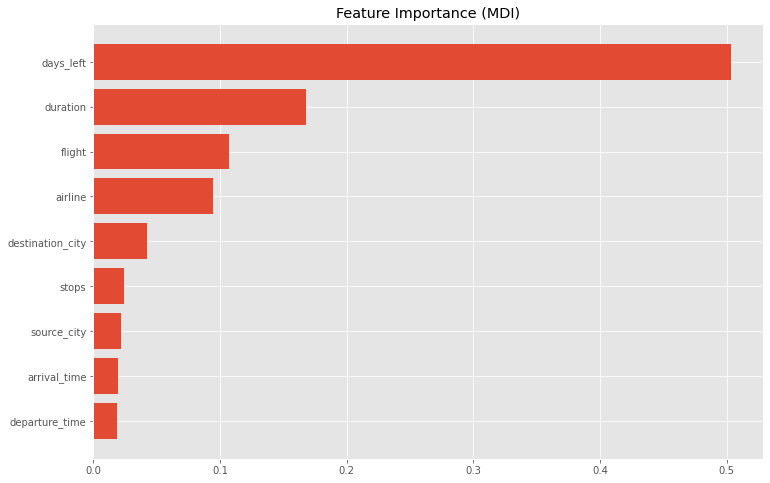

In [95]:
#Plot feature importance

# obtain feature importance
feature_importance = model.feature_importances_
# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
feature_names = x.columns

plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

### For Business Class

In [96]:
# Isolate target variable
y = business_df['price']

# Isolate target variables
x = bus_factorized_df.drop(['price', '#'], axis=1)

In [97]:
#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [98]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 19.011671899375372
R-squared: 0.9134193002630819


Text(0.5, 1.0, 'Feature Importance (MDI)')

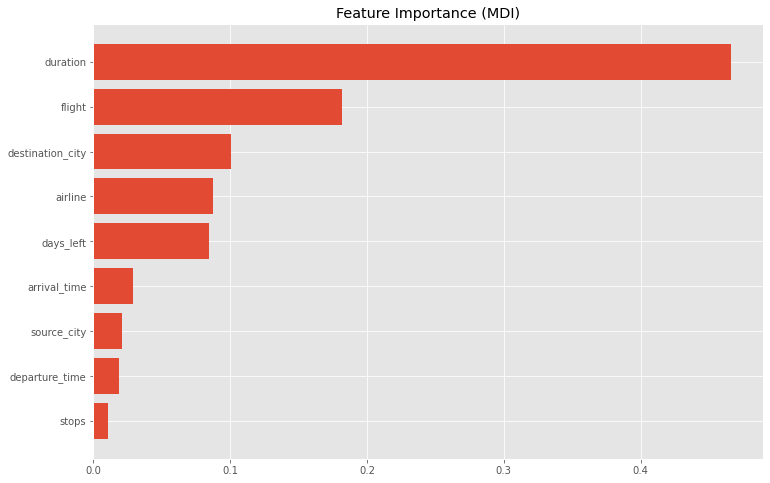

In [99]:
# obtain feature importance
feature_importance = model.feature_importances_

#Plot feature importance

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
feature_names = x.columns

plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")